In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Read CSVs

In [46]:
rashomon_csv = "../Results/worst_case_rashomon.csv"
rashomon_raw_df = pd.read_csv(rashomon_csv)
rashomon_raw_df = rashomon_raw_df.drop("Unnamed: 0", axis=1)
rashomon_raw_df.head()

,n_per_pol,sim_num,num_pools,MSE,IOU,min_dosage,best_pol_MSE
0,10,0,4,1.273589,0.666667,True,0.431312
1,10,0,6,1.273541,0.666667,True,0.431312
2,10,0,6,1.246443,0.666667,True,0.431312
3,10,0,6,1.163541,0.500000,True,-0.031748
4,10,0,6,0.882880,1.000000,True,-0.124469


In [47]:
lasso_csv = "../Results/worst_case_lasso.csv"
lasso_raw_df = pd.read_csv(lasso_csv)
lasso_raw_df = lasso_raw_df.drop("Unnamed: 0", axis=1)
lasso_raw_df.head()

,n_per_pol,sim_num,MSE,L1_loss,IOU,min_dosage,best_pol_MSE
0,10,0,1.292713,1.815938,0.0,False,0.767750
1,10,1,1.306908,1.829085,0.0,False,0.778222
2,10,2,1.213292,1.753783,0.0,False,0.595090
3,10,3,1.438126,1.972719,0.0,False,0.654070
4,10,4,1.455133,1.967549,0.0,False,0.875831


## Summarize rashomon sets results

In [48]:
rashomon_df = rashomon_raw_df.copy()

rashomon_df["best_pol_MSE"] = rashomon_df["best_pol_MSE"]**2

group_by_cols = ["n_per_pol", "sim_num"]
result_cols = ["num_pools", "MSE", "IOU", "min_dosage", "best_pol_MSE"]
for result_col in result_cols:
    result_min_col = result_col + "_min"
    result_avg_col = result_col + "_mean"
    result_max_col = result_col + "_max"
    result_var_col = result_col + "_var"
    
    rashomon_df[result_min_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("min")
    rashomon_df[result_avg_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("mean")
    rashomon_df[result_max_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("max")
    rashomon_df[result_var_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("var")

rashomon_df = rashomon_df.drop_duplicates(group_by_cols)
rashomon_df = rashomon_df.drop(result_cols, axis=1)
rashomon_df.head(n=10)

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,4,6.750000,9,3.071429,0.853268,1.056888,1.273589,0.039268,...,1.0,0.047619,False,0.875000,True,0.125000,0.001008,0.081593,0.186030,0.007644
8,10,1,4,6.750000,9,3.071429,0.940916,1.143865,1.351151,0.035473,...,1.0,0.047619,False,0.875000,True,0.125000,0.001543,0.152435,0.361632,0.030337
16,10,2,4,6.333333,9,2.606061,0.831106,1.162066,1.349434,0.058437,...,1.0,0.035985,False,0.916667,True,0.083333,0.000141,0.405905,1.090605,0.195139
28,10,3,4,6.571429,9,4.619048,0.999373,1.206772,1.556189,0.066699,...,1.0,0.054233,True,1.000000,True,0.000000,0.009221,0.150018,0.694018,0.062911
35,10,4,4,7.000000,9,4.000000,0.942567,1.089282,1.433604,0.045067,...,1.0,0.062963,True,1.000000,True,0.000000,0.026816,0.080342,0.259708,0.008189
41,10,5,4,6.400000,9,3.155556,0.861775,1.158657,1.583911,0.067422,...,1.0,0.043519,False,0.800000,True,0.177778,0.001373,0.115434,0.686098,0.042811
51,10,6,4,7.000000,9,4.000000,0.961025,1.111481,1.437311,0.042469,...,1.0,0.062963,False,0.833333,True,0.166667,0.000074,0.061423,0.349174,0.019895
57,10,7,4,6.400000,9,3.155556,0.961201,1.209663,1.520150,0.048061,...,1.0,0.043519,False,0.900000,True,0.100000,0.053490,0.478465,1.688050,0.290784
67,10,8,4,6.857143,9,3.476190,0.979523,1.146745,1.434280,0.039462,...,1.0,0.054233,True,1.000000,True,0.000000,0.003527,0.074415,0.216703,0.009557
74,10,9,4,6.750000,9,3.071429,0.997503,1.147400,1.308940,0.022019,...,1.0,0.047619,True,1.000000,True,0.000000,0.005274,0.186101,0.475842,0.057618


## Average over simulations

In [49]:
sum_cols = [
    "num_pools_min", "num_pools_mean", "num_pools_max", "num_pools_var",
    "MSE_min", "MSE_mean", "MSE_max", "MSE_var",
    "IOU_min", "IOU_mean", "IOU_max", "IOU_var",
    "min_dosage_min", "min_dosage_mean", "min_dosage_max", "min_dosage_var",
    "best_pol_MSE_min", "best_pol_MSE_mean", "best_pol_MSE_max", "best_pol_MSE_var"
]

for sum_col in sum_cols:
    rashomon_df[sum_col] = rashomon_df.groupby("n_per_pol")[sum_col].transform("mean")

rashomon_df = rashomon_df.drop_duplicates("n_per_pol")
rashomon_df.head()

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,4.04,6.664754,8.91,3.419607,0.925803,1.140127,1.449453,0.046629,...,1.0,0.049794,0.44,0.894185,1.0,0.095748,0.022374,0.200069,0.642109,0.073872
905,100,0,4.00,6.743858,9.00,3.297025,0.991623,1.165520,1.405384,0.037915,...,1.0,0.049614,0.44,0.921789,1.0,0.076777,0.002441,0.105591,0.364920,0.030087
1690,1000,0,4.00,6.760000,9.00,3.108571,0.999279,1.171630,1.372884,0.035664,...,1.0,0.048233,0.48,0.934167,1.0,0.065833,0.000264,0.091731,0.249096,0.016358
2482,5000,0,4.00,6.750000,9.00,3.071429,1.000382,1.176021,1.375080,0.036189,...,1.0,0.047619,0.46,0.932500,1.0,0.067500,0.000055,0.093966,0.250364,0.016789


In [50]:
lasso_df = lasso_raw_df.copy()

sum_cols_lasso = ["MSE", "L1_loss", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_lasso:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"
    
    lasso_df[result_min_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("min")
    lasso_df[result_avg_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("mean")
    lasso_df[result_max_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("max")
    lasso_df[result_var_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("var")

lasso_df = lasso_df.drop_duplicates("n_per_pol")
lasso_df = lasso_df.drop(sum_cols_lasso, axis=1)
lasso_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,L1_loss_min,L1_loss_mean,L1_loss_max,L1_loss_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,1.008689,1.317999,1.755309,0.019280,1.521755,1.840381,2.269648,0.019690,...,0.666667,0.010505,False,0.01,True,0.01,0.051629,0.776177,1.222557,0.042467
100,100,0,1.255466,1.351934,1.448634,0.001654,1.776271,1.873097,1.973138,0.001719,...,0.000000,0.000000,False,0.00,False,0.00,0.631970,0.788373,0.991073,0.004666
200,1000,0,1.319118,1.357715,1.398697,0.000230,1.839873,1.878554,1.925381,0.000243,...,0.000000,0.000000,False,0.00,False,0.00,0.733159,0.791610,0.836986,0.000498
300,5000,0,1.342784,1.360589,1.375497,0.000043,1.864177,1.881055,1.895010,0.000043,...,0.000000,0.000000,False,0.00,False,0.00,0.770641,0.795343,0.823494,0.000081


## Plots

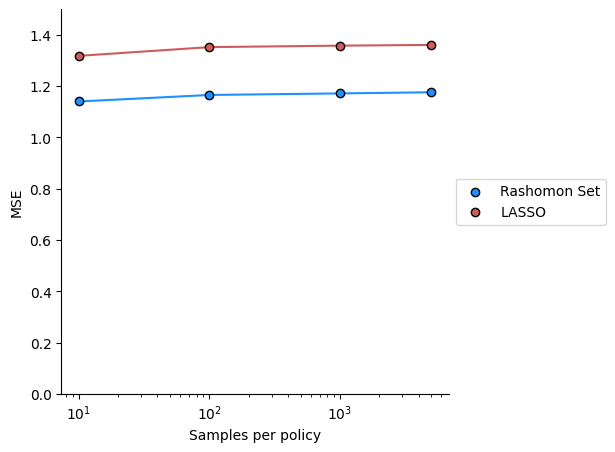

In [148]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["MSE_mean"],
        color="dodgerblue", zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["MSE_mean"],
           color="dodgerblue", edgecolor="black", zorder=1.1, label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["MSE_mean"],
        color="indianred", zorder=1)
ax.scatter(lasso_df["n_per_pol"], lasso_df["MSE_mean"],
           color="indianred", edgecolor="black", zorder=3, clip_on=False,
           label="LASSO")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy")
ax.set_ylim(0, 1.5)
ax.set_ylabel("MSE")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/MSE.png", dpi=300, bbox_inches="tight")
plt.show()

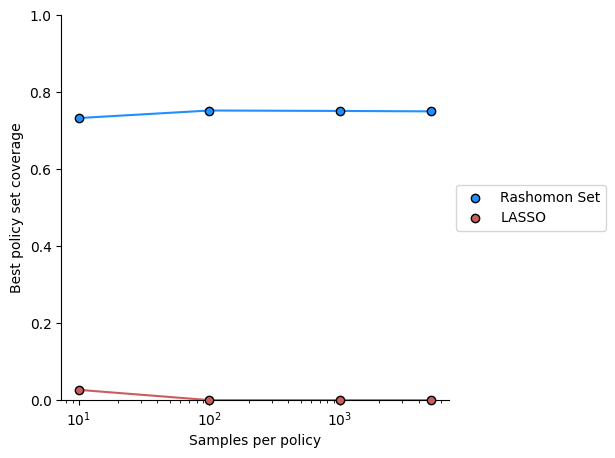

In [149]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["IOU_mean"],
        color="dodgerblue", zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["IOU_mean"],
           color="dodgerblue", edgecolor="black", zorder=1.1, label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["IOU_mean"],
        color="indianred", zorder=3)
ax.scatter(lasso_df["n_per_pol"], lasso_df["IOU_mean"],
           color="indianred", edgecolor="black", zorder=3.5, clip_on=False,
           label="LASSO")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy")
ax.set_ylim(0, 1)
ax.set_ylabel("Best policy set coverage")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/policy_coverage.png", dpi=300, bbox_inches="tight")
plt.show()

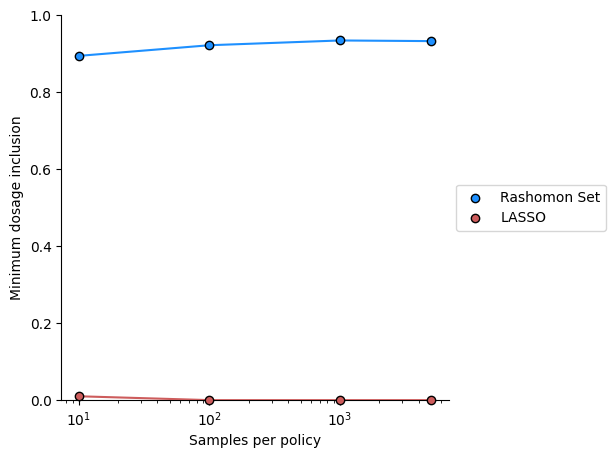

In [150]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["min_dosage_mean"],
        color="dodgerblue", zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["min_dosage_mean"],
           color="dodgerblue", edgecolor="black", zorder=1.1, label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["min_dosage_mean"],
        color="indianred", zorder=3)
ax.scatter(lasso_df["n_per_pol"], lasso_df["min_dosage_mean"],
           color="indianred", edgecolor="black", zorder=3.5, clip_on=False,
           label="LASSO")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy")
ax.set_ylim(0, 1)
ax.set_ylabel("Minimum dosage inclusion")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/min_dosage_inclusion.png", dpi=300, bbox_inches="tight")
plt.show()

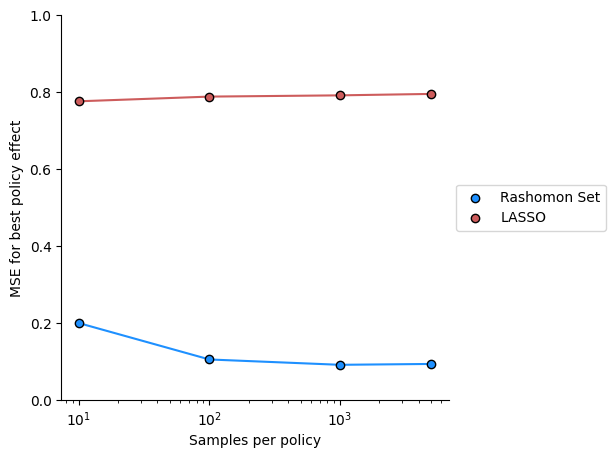

In [151]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["best_pol_MSE_mean"],
        color="dodgerblue", zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["best_pol_MSE_mean"],
           color="dodgerblue", edgecolor="black", zorder=1.1, label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["best_pol_MSE_mean"],
        color="indianred", zorder=1)
ax.scatter(lasso_df["n_per_pol"], lasso_df["best_pol_MSE_mean"],
           color="indianred", edgecolor="black", zorder=3, clip_on=False,
           label="LASSO")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy")
ax.set_ylim(0, 1)
ax.set_ylabel("MSE for best policy effect")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/best_policy_MSE.png", dpi=300, bbox_inches="tight")
plt.show()